In [60]:
# Import packages

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
# Import data. Using wget() here but can also use curl). Understand the difference between the two options
# Note the amazon s3 bucket that is used to download data
# Wget is not working at this time, so I am using curl()
# !wget -O FuelConsumption.csv "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"

In [8]:
# Using curl instead of wget

!curl https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv -o FuelConsumption.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 45 72629   45 32768    0     0   125k      0 --:--:-- --:--:-- --:--:--  125k
100 72629  100 72629    0     0   247k      0 --:--:-- --:--:-- --:--:--  246k


In [9]:
# Read in the date into a dataframe and look at the dataset (the first few rows) and the total number of rows and columns

df = pd.read_csv("FuelConsumption.csv")
df.shape, df.head()

((1067, 13),
    MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
 0       2014  ACURA         ILX      COMPACT         2.0          4   
 1       2014  ACURA         ILX      COMPACT         2.4          4   
 2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
 3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
 4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
 
   TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
 0          AS5        Z                   9.9                  6.7   
 1           M6        Z                  11.2                  7.7   
 2          AV7        Z                   6.0                  5.8   
 3          AS6        Z                  12.7                  9.1   
 4          AS6        Z                  12.1                  8.7   
 
    FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
 0                   8.5                        33        

In [10]:
# Data Exploration: Summarize the Data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
# Select some features to explore and to plot them

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


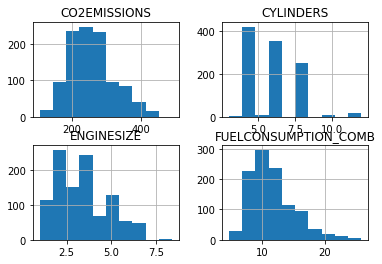

In [18]:
# Plot

viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

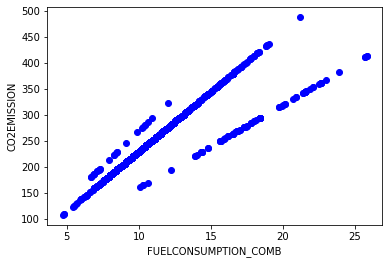

In [22]:
# Plot each of the above features versus emission to see the linearity in each pair of relations
# Plot FUELCONSUMPTION_COMB against CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

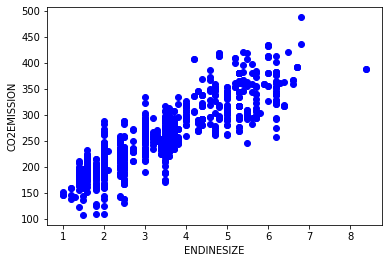

In [23]:
# Plot each of the above features versus emission to see the linearity in each pair of relations
# Plot ENGINESIZE against CO2EMISSIONS

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENDINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

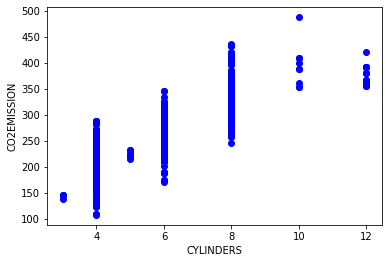

In [25]:
# Plot each of the above features versus emission to see the linearity in each pair of relations
# Plot CYLINDER against CO2EMISSIONS

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSION")
plt.show()

In [46]:
# Train - Test Split
# IS THIS THE NUMPY WAY OF SPLITTING A DATASET INTO TRAIN AND TEST????
# len(df) # Gives number of rows of the dataframe-df
from pandas import DataFrame
# lst = DataFrame([1,2,3,5,4,3,6,9])
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(train), len(test)

(844, 223)

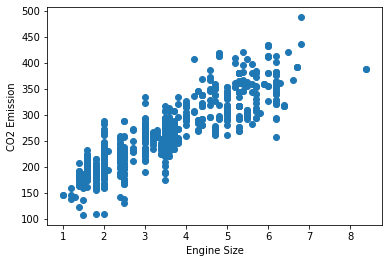

In [47]:
# See the Train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [56]:
# Modeling

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#Print the coefficients

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


Coefficients:  [[39.09758114]]
Intercept:  [126.70257896]


Text(0, 0.5, 'Emission')

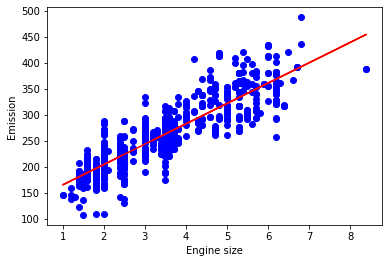

In [58]:
# Plot the fit-line over the data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [64]:
# Model Evaluation

# compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics 
# provide a key role in the development of a model, as it provides insight to areas that require improvement.

# There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test
# set:

# Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand 
# since it’s just average error.
# Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute
# error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing 
# larger errors in comparison to smaller ones.
# Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
# R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the 
# fitted regression line. The higher the R-squared, the better the model fits your data.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pred_y = test_y_hat = regr.predict(test_y)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 9520.23
Residual sum of squares (MSE): 96172645.99
R2-score: -15.49
